In [ ]:
import pandas as pd
import re
import string

# Load the dataset
file_path = "Train_Task_A.xlsx"
data = pd.read_excel(file_path)

# Preview the data
print("Initial Dataset:\n", data.head())

# Preprocessing function for text cleaning
def preprocess_text(text):
    if isinstance(text, str):  # Check if the text is a string
        # Remove URLs
        text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
        # Remove user mentions (@username)
        text = re.sub(r'@\w+', '', text)
        # Remove hashtags
        text = re.sub(r'#\w+', '', text)
        # Remove emojis
        text = re.sub(r'[^\w\s,]', '', text)
        # Remove punctuation
        text = text.translate(str.maketrans('', '', string.punctuation))
        # Convert to lowercase
        text = text.lower()
        # Remove extra spaces
        text = re.sub(r'\s+', ' ', text).strip()
        return text
    else:
        return ""  # Return an empty string if the value is not a string

# Ensure all values in the 'Tweet' column are strings and handle missing values
data['Tweet'] = data['Tweet'].fillna("").astype(str)

# Apply preprocessing to the 'Tweet' column
data['Cleaned_Tweet'] = data['Tweet'].apply(preprocess_text)

# Save the preprocessed dataset to a CSV file
output_file_path = "Preprocessed_Train_Task_A.csv"
data.to_csv(output_file_path, index=False)

print(f"Preprocessed dataset saved to {output_file_path}")

# Check dataset consistency
print("Dataset Info:")
print(data.info())

print("Sample of Preprocessed Data:")
print(data[['Tweet', 'Cleaned_Tweet', 'Hate', 'Fake']].head())


Initial Dataset:
      Id                                              Tweet  Hate  Fake
0  5723  @sudhirchaudhary Abhi tak 2000 ke note me mujh...     0     0
1  2338  @Gulamane_raza @MustakimRazvi Abe katiye tumse...     1     1
2  1579  @RajatSharmaLive Ye sab sazish hai....bina sam...     1     1
3  6524  abe jao tum to dasko pahle hi fash gye the jab...     1     0
4  7618  Ab ye afbah kaun faila Raha hai ki Shahhen bag...     0     0
Preprocessed dataset saved to Preprocessed_Train_Task_A.csv
Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6396 entries, 0 to 6395
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id             6396 non-null   int64 
 1   Tweet          6396 non-null   object
 2   Hate           6396 non-null   int64 
 3   Fake           6396 non-null   int64 
 4   Cleaned_Tweet  6396 non-null   object
dtypes: int64(3), object(2)
memory usage: 250.0+ KB
None
Sample of Preproce

Missing rows in 'cleaned_text': 0
Empty rows in 'cleaned_text': 8
count    6396.000000
mean       25.759537
std        15.855180
min         0.000000
25%        13.000000
50%        24.000000
75%        38.000000
max       234.000000
Name: text_length, dtype: float64


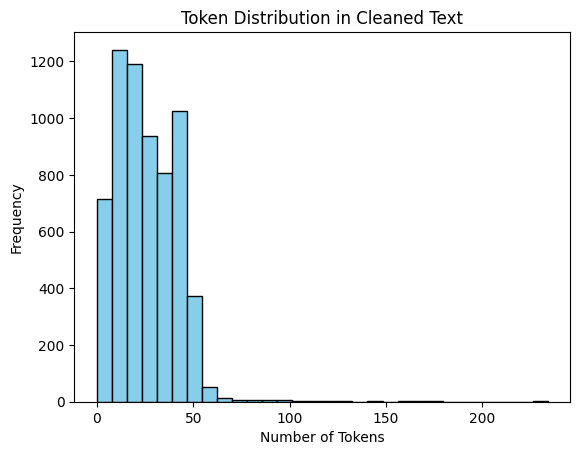

Fake Label Distribution:
Fake
1    3286
0    3110
Name: count, dtype: int64
Hate Label Distribution:
Hate
1    4101
0    2295
Name: count, dtype: int64


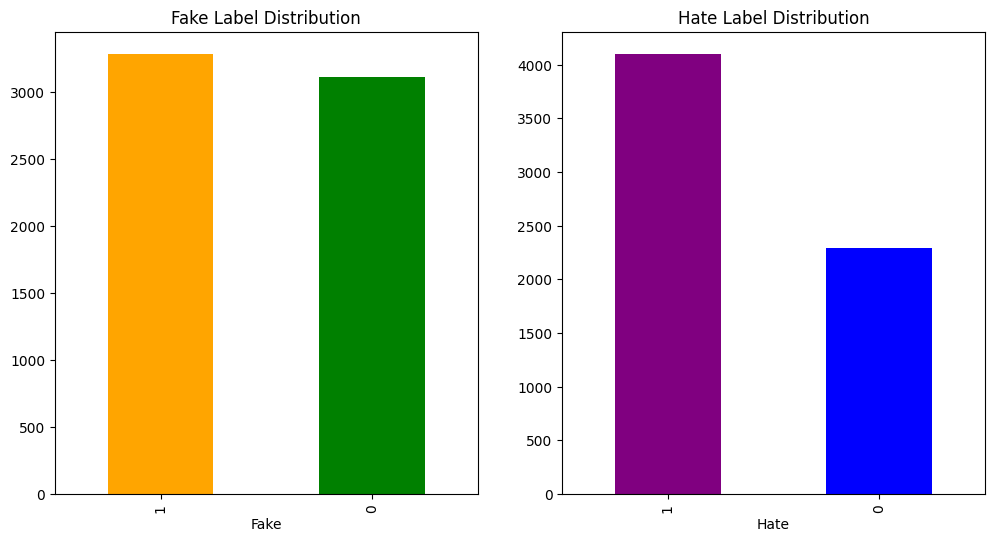

In [ ]:
import matplotlib.pyplot as plt

# Check for missing or empty rows
missing_text = data['Cleaned_Tweet'].isnull().sum()
empty_text = data['Cleaned_Tweet'].str.strip().eq("").sum()

print(f"Missing rows in 'cleaned_text': {missing_text}")
print(f"Empty rows in 'cleaned_text': {empty_text}")

# Analyze token distribution
data['text_length'] = data['Cleaned_Tweet'].apply(lambda x: len(x.split()))
print(data['text_length'].describe())  # Show statistics for text length

plt.hist(data['text_length'], bins=30, color='skyblue', edgecolor='black')
plt.title("Token Distribution in Cleaned Text")
plt.xlabel("Number of Tokens")
plt.ylabel("Frequency")
plt.show()

# Check class balance for labels
fake_distribution = data['Fake'].value_counts()
hate_distribution = data['Hate'].value_counts()

print("Fake Label Distribution:")
print(fake_distribution)

print("Hate Label Distribution:")
print(hate_distribution)

# Plot class balance
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
fake_distribution.plot(kind='bar', ax=axes[0], title="Fake Label Distribution", color=['orange', 'green'])
hate_distribution.plot(kind='bar', ax=axes[1], title="Hate Label Distribution", color=['purple', 'blue'])
plt.show()


In [ ]:
from sklearn.utils import resample

# Remove rows with empty 'Cleaned_Tweet'
data = data[data['Cleaned_Tweet'] != ""]  # Exclude rows where text length is 0

# Separate majority and minority classes
hate_majority = data[data['Hate'] == 1]
hate_minority = data[data['Hate'] == 0]

# Oversample the minority class
hate_minority_oversampled = resample(
    hate_minority,
    replace=True,  # Sample with replacement
    n_samples=len(hate_majority),  # Match number of majority class
    random_state=42  # For reproducibility
)

# Combine the oversampled minority class with the majority class
balanced_data = pd.concat([hate_majority, hate_minority_oversampled])

# Shuffle the dataset
balanced_data = balanced_data.sample(frac=1, random_state=42).reset_index(drop=True)

# Save the balanced dataset to a CSV file
balanced_output_file_path = "Balanced_Train_Task_A.csv"
balanced_data.to_csv(balanced_output_file_path, index=False)

# Display basic statistics
print(f"Balanced dataset saved to {balanced_output_file_path}")
print("Balanced 'Hate' Label Distribution:\n", balanced_data['Hate'].value_counts())
print("Balanced 'Fake' Label Distribution:\n", balanced_data['Fake'].value_counts())

# Check for any remaining missing values
missing_rows = balanced_data[balanced_data['Cleaned_Tweet'] == ""]
print(f"Missing rows after balancing: {len(missing_rows)}")


Balanced dataset saved to Balanced_Train_Task_A.csv
Balanced 'Hate' Label Distribution:
 Hate
1    4098
0    4098
Name: count, dtype: int64
Balanced 'Fake' Label Distribution:
 Fake
0    4404
1    3792
Name: count, dtype: int64
Missing rows after balancing: 0


Missing rows in 'cleaned_text': 0
Empty rows in 'cleaned_text': 0
count    8196.000000
mean       25.096755
std        15.735823
min         1.000000
25%        12.000000
50%        23.000000
75%        37.000000
max       234.000000
Name: text_length, dtype: float64


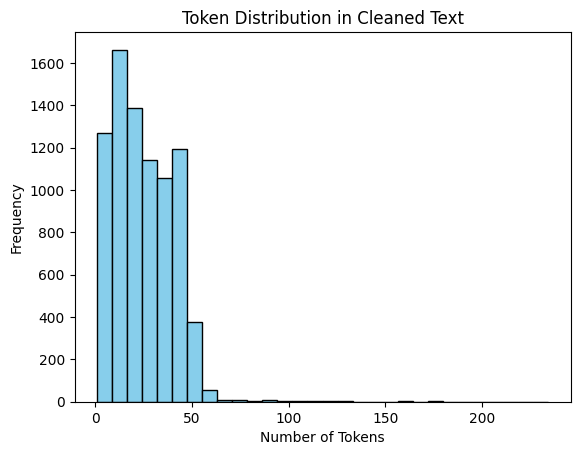

Fake Label Distribution:
Fake
0    4404
1    3792
Name: count, dtype: int64
Hate Label Distribution:
Hate
1    4098
0    4098
Name: count, dtype: int64


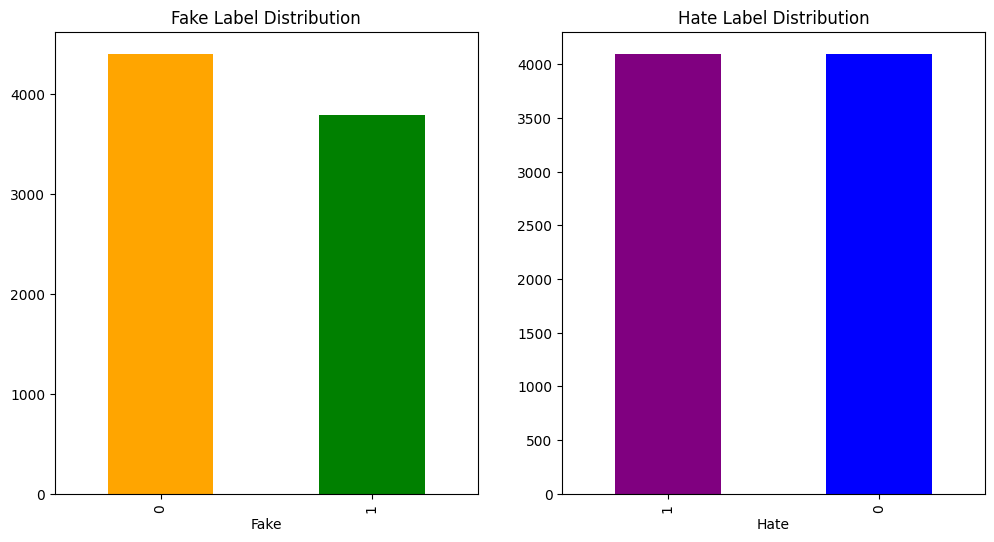

In [ ]:
import matplotlib.pyplot as plt
data =  pd.read_csv('Balanced_Train_Task_A.csv')

# Check for missing or empty rows
missing_text = data['Cleaned_Tweet'].isnull().sum()
empty_text = data['Cleaned_Tweet'].str.strip().eq("").sum()

print(f"Missing rows in 'cleaned_text': {missing_text}")
print(f"Empty rows in 'cleaned_text': {empty_text}")

# Analyze token distribution
data['text_length'] = data['Cleaned_Tweet'].apply(lambda x: len(x.split()))
print(data['text_length'].describe())  # Show statistics for text length

plt.hist(data['text_length'], bins=30, color='skyblue', edgecolor='black')
plt.title("Token Distribution in Cleaned Text")
plt.xlabel("Number of Tokens")
plt.ylabel("Frequency")
plt.show()

# Check class balance for labels
fake_distribution = data['Fake'].value_counts()
hate_distribution = data['Hate'].value_counts()

print("Fake Label Distribution:")
print(fake_distribution)

print("Hate Label Distribution:")
print(hate_distribution)

# Plot class balance
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
fake_distribution.plot(kind='bar', ax=axes[0], title="Fake Label Distribution", color=['orange', 'green'])
hate_distribution.plot(kind='bar', ax=axes[1], title="Hate Label Distribution", color=['purple', 'blue'])
plt.show()

In [ ]:
# Check for duplicate rows
duplicate_rows = data.duplicated(subset=['Cleaned_Tweet'], keep=False)
print(f"Number of duplicate rows: {duplicate_rows.sum()}")

# Remove duplicates
data = data.drop_duplicates(subset=['Cleaned_Tweet'], keep='first').reset_index(drop=True)
print(f"Dataset size after removing duplicates: {len(data)}")


Number of duplicate rows: 3614
Dataset size after removing duplicates: 5851


In [ ]:
# Recheck class distributions
print("Hate Label Distribution After Removing Duplicates:")
print(data['Hate'].value_counts())

print("\nFake Label Distribution After Removing Duplicates:")
print(data['Fake'].value_counts())


Hate Label Distribution After Removing Duplicates:
Hate
1    4014
0    1837
Name: count, dtype: int64

Fake Label Distribution After Removing Duplicates:
Fake
1    3097
0    2754
Name: count, dtype: int64


In [ ]:
data.to_csv('Preprocessed_Balanced_Dataset.csv', index=False)
print("Balanced and preprocessed dataset saved.")


Balanced and preprocessed dataset saved.


In [ ]:
data =  pd.read_csv('Preprocessed_Balanced_Dataset.csv')
duplicate_rows = data.duplicated(subset=['Cleaned_Tweet'], keep=False)
print(f"Number of duplicate rows: {duplicate_rows.sum()}")

Number of duplicate rows: 0


In [ ]:
# Check unique values in 'Hate' and 'Fake'
print("Unique values in 'Hate':", data['Hate'].unique())
print("Unique values in 'Fake':", data['Fake'].unique())

# Find rows with invalid labels (if any)
invalid_labels = data[(~data['Hate'].isin([0, 1])) | (~data['Fake'].isin([0, 1]))]
print(f"Rows with invalid labels: {len(invalid_labels)}")


Unique values in 'Hate': [1 0]
Unique values in 'Fake': [0 1]
Rows with invalid labels: 0


In [ ]:
# Analyze text length statistics
data['text_length'] = data['Cleaned_Tweet'].apply(len)
print(data['text_length'].describe())

# Filter rows based on text length if necessary
min_length = 5   # Minimum characters for meaningful text
max_length = 280  # Twitter's maximum character limit
data = data[(data['text_length'] >= min_length) & (data['text_length'] <= max_length)]

print(f"Dataset size after filtering by text length: {len(data)}")


count    5851.000000
mean      136.288498
std        79.678496
min         1.000000
25%        73.000000
50%       128.000000
75%       198.000000
max      1160.000000
Name: text_length, dtype: float64
Dataset size after filtering by text length: 5776


In [ ]:
import pandas as pd

# Load your preprocessed dataset
data = pd.read_csv("Preprocessed_Balanced_Dataset.csv")  # Replace with your actual file name

# **1. Check for Missing or Empty Rows**
missing_rows = data['Cleaned_Tweet'].isnull().sum()
empty_rows = (data['Cleaned_Tweet'].str.strip() == "").sum()

# **2. Check for Duplicates**
duplicate_rows = data.duplicated().sum()

# **3. Analyze the Distribution of Labels**
hate_distribution = data['Hate'].value_counts()
fake_distribution = data['Fake'].value_counts()

# **4. Analyze Text Length**
data['text_length'] = data['Cleaned_Tweet'].str.len()
length_stats = data['text_length'].describe()

# **5. Check for Outliers in Text Length**
min_length = 5  # Define a minimum acceptable length for tweets
max_length = 300  # Define a maximum acceptable length for tweets (based on your use case)
outliers = data[(data['text_length'] < min_length) | (data['text_length'] > max_length)].shape[0]

# Generate a Summary Report
print("Dataset Preprocessing Summary:")
print("-----------------------------------")
print(f"Dataset Size: {data.shape[0]} rows")
print(f"Missing Rows in 'Cleaned_Tweet': {missing_rows}")
print(f"Empty Rows in 'Cleaned_Tweet': {empty_rows}")
print(f"Duplicate Rows: {duplicate_rows}")
print("\nLabel Distributions:")
print(f"Hate Label Distribution:\n{hate_distribution}")
print(f"Fake Label Distribution:\n{fake_distribution}")
print("\nText Length Statistics:")
print(length_stats)
print(f"Number of Outliers in Text Length: {outliers}")

# Final Decision
if missing_rows == 0 and empty_rows == 0 and duplicate_rows == 0 and outliers == 0:
    print("\n✅ The dataset is perfectly preprocessed and ready for modeling!")
else:
    print("\n❌ The dataset has issues that need to be addressed before modeling.")


Dataset Preprocessing Summary:
-----------------------------------
Dataset Size: 5851 rows
Missing Rows in 'Cleaned_Tweet': 0
Empty Rows in 'Cleaned_Tweet': 0
Duplicate Rows: 0

Label Distributions:
Hate Label Distribution:
Hate
1    4014
0    1837
Name: count, dtype: int64
Fake Label Distribution:
Fake
1    3097
0    2754
Name: count, dtype: int64

Text Length Statistics:
count    5851.000000
mean      136.288498
std        79.678496
min         1.000000
25%        73.000000
50%       128.000000
75%       198.000000
max      1160.000000
Name: text_length, dtype: float64
Number of Outliers in Text Length: 65

❌ The dataset has issues that need to be addressed before modeling.


In [ ]:
from sklearn.utils import resample

# **1. Remove Text Length Outliers**
min_length, max_length = 5, 300
data_filtered = data[(data['text_length'] >= min_length) & (data['text_length'] <= max_length)]

# **2. Balance Hate Labels with Oversampling**
# Separate majority and minority classes for the Hate label
hate_majority = data_filtered[data_filtered['Hate'] == 1]
hate_minority = data_filtered[data_filtered['Hate'] == 0]

# Oversample the minority class
hate_minority_oversampled = resample(
    hate_minority,
    replace=True,  # Sampling with replacement
    n_samples=len(hate_majority),  # Match the majority class count
    random_state=42  # For reproducibility
)

# Combine oversampled minority class with the majority class
data_balanced = pd.concat([hate_majority, hate_minority_oversampled])

# **3. Shuffle the Dataset**
data_balanced = data_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# **4. Save the Final Preprocessed Dataset**
data_balanced.to_csv("final_preprocessed_dataset_oversampled.csv", index=False)

# **5. Output Summary**
print("Final Dataset Summary (Oversampling):")
print("--------------------------------------")
print(f"Dataset Size: {data_balanced.shape[0]} rows")
print(f"Missing Rows in 'Cleaned_Tweet': {data_balanced['Cleaned_Tweet'].isnull().sum()}")
print(f"Empty Rows in 'Cleaned_Tweet': {(data_balanced['Cleaned_Tweet'].str.strip() == '').sum()}")
print("\nLabel Distributions:")
print(f"Hate Label Distribution:\n{data_balanced['Hate'].value_counts()}")
print(f"Fake Label Distribution:\n{data_balanced['Fake'].value_counts()}")
print("\nText Length Statistics:")
print(data_balanced['text_length'].describe())


Final Dataset Summary (Oversampling):
--------------------------------------
Dataset Size: 7934 rows
Missing Rows in 'Cleaned_Tweet': 0
Empty Rows in 'Cleaned_Tweet': 0

Label Distributions:
Hate Label Distribution:
Hate
1    3967
0    3967
Name: count, dtype: int64
Fake Label Distribution:
Fake
0    4285
1    3649
Name: count, dtype: int64

Text Length Statistics:
count    7934.000000
mean      127.757751
std        71.912827
min         7.000000
25%        63.000000
50%       120.000000
75%       193.000000
max       299.000000
Name: text_length, dtype: float64


In [ ]:
import pandas as pd
import random
from nltk.corpus import wordnet
from sklearn.utils import shuffle

# Load the dataset
file_path = 'final_preprocessed_dataset_oversampled.csv'
df = pd.read_csv(file_path)

# Check for duplicates
duplicates = df.duplicated(subset='Cleaned_Tweet', keep=False)
print(f"Number of duplicate rows: {duplicates.sum()}")

import nltk
nltk.download('wordnet')  # Download WordNet for synonym replacement
nltk.download('omw-1.4')  # Download the Open Multilingual WordNet data


# Function to perform synonym replacement
def synonym_replacement(text, n=1):
    words = text.split()
    new_words = words.copy()
    random_word_list = list(set([word for word in words if wordnet.synsets(word)]))
    random.shuffle(random_word_list)

    num_replaced = 0
    for random_word in random_word_list:
        synonyms = wordnet.synsets(random_word)
        if synonyms:
            synonym = synonyms[0].lemmas()[0].name()
            if synonym != random_word:
                new_words = [synonym if word == random_word else word for word in new_words]
                num_replaced += 1
        if num_replaced >= n:
            break

    return ' '.join(new_words)

# Remove duplicates and keep a copy of the removed rows
removed_duplicates = df[df.duplicated(subset='Cleaned_Tweet', keep='first')]
df = df.drop_duplicates(subset='Cleaned_Tweet', keep='first')

# Generate synthetic rows to balance the dataset
num_rows_needed = len(removed_duplicates)
synthetic_data = []

for _, row in removed_duplicates.iterrows():
    augmented_text = synonym_replacement(row['Cleaned_Tweet'], n=2)
    synthetic_row = row.copy()
    synthetic_row['Cleaned_Tweet'] = augmented_text
    synthetic_data.append(synthetic_row)

# Convert synthetic data into a DataFrame
synthetic_df = pd.DataFrame(synthetic_data)

# Add the synthetic data back to the original dataset
df = pd.concat([df, synthetic_df], ignore_index=True)

# Shuffle the dataset
df = shuffle(df)

# Save the updated dataset
output_path = 'Final_balanced_dataset.csv'
df.to_csv(output_path, index=False)

print(f"New dataset size: {len(df)}")
print(f"Processed dataset saved to: {output_path}")


Number of duplicate rows: 3549


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


New dataset size: 7934
Processed dataset saved to: Final_balanced_dataset.csv


In [ ]:
import pandas as pd

# Load your preprocessed dataset
data = pd.read_csv("Final_balanced_dataset.csv")  # Replace with your actual file name

# **1. Check for Missing or Empty Rows**
missing_rows = data['Cleaned_Tweet'].isnull().sum()
empty_rows = (data['Cleaned_Tweet'].str.strip() == "").sum()

# **2. Check for Duplicates**
duplicate_rows = data.duplicated().sum()

# **3. Analyze the Distribution of Labels**
hate_distribution = data['Hate'].value_counts()
fake_distribution = data['Fake'].value_counts()

# **4. Analyze Text Length**
data['text_length'] = data['Cleaned_Tweet'].str.len()
length_stats = data['text_length'].describe()

# **5. Check for Outliers in Text Length**
min_length = 5  # Define a minimum acceptable length for tweets
max_length = 300  # Define a maximum acceptable length for tweets (based on your use case)
outliers = data[(data['text_length'] < min_length) | (data['text_length'] > max_length)].shape[0]

# Generate a Summary Report
print("Dataset Preprocessing Summary:")
print("-----------------------------------")
print(f"Dataset Size: {data.shape[0]} rows")
print(f"Missing Rows in 'Cleaned_Tweet': {missing_rows}")
print(f"Empty Rows in 'Cleaned_Tweet': {empty_rows}")
print(f"Duplicate Rows: {duplicate_rows}")
print("\nLabel Distributions:")
print(f"Hate Label Distribution:\n{hate_distribution}")
print(f"Fake Label Distribution:\n{fake_distribution}")
print("\nText Length Statistics:")
print(length_stats)
print(f"Number of Outliers in Text Length: {outliers}")

# Final Decision
if missing_rows == 0 and empty_rows == 0 and duplicate_rows == 0 and outliers == 0:
    print("\n✅ The dataset is perfectly preprocessed and ready for modeling!")
else:
    print("\n❌ The dataset has issues that need to be addressed before modeling.")

Dataset Preprocessing Summary:
-----------------------------------
Dataset Size: 7934 rows
Missing Rows in 'Cleaned_Tweet': 0
Empty Rows in 'Cleaned_Tweet': 0
Duplicate Rows: 653

Label Distributions:
Hate Label Distribution:
Hate
1    3967
0    3967
Name: count, dtype: int64
Fake Label Distribution:
Fake
0    4285
1    3649
Name: count, dtype: int64

Text Length Statistics:
count    7934.000000
mean      130.043484
std        72.014047
min         7.000000
25%        67.000000
50%       122.000000
75%       195.000000
max       299.000000
Name: text_length, dtype: float64
Number of Outliers in Text Length: 0

❌ The dataset has issues that need to be addressed before modeling.
